In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.utils import to_categorical

In [2]:
def train_bird_cnn(epochs=20, batch_size=32, early_stopping_patience=3):
    # Load & prepare data
    with h5py.File('bird_spectrograms_3sec_native_fixed.h5', 'r') as f:
        X1 = np.transpose(f['rewbla'][:], (2, 0, 1)).astype('float32') / 255.0
        X2 = np.transpose(f['daejun'][:], (2, 0, 1)).astype('float32') / 255.0

    X = np.concatenate([X1, X2])
    y = np.array([0]*len(X1) + [1]*len(X2))
    X = X[..., np.newaxis]
    X, y = shuffle(X, y, random_state=42)

    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp)

    print("Train set size:", len(y_train))
    print("Validation set size:", len(y_val))
    print("Test set size:", len(y_test))

    # Define CNN
    model = models.Sequential([
        layers.Input(shape=X_train.shape[1:]),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),  
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = callbacks.EarlyStopping(patience=early_stopping_patience, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop]
    )

    # Evaluation
    loss, acc = model.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {acc:.4f}")
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    model.summary()

    # Plot training curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    pretty_labels = ['Red-winged Blackbird', 'Dark-eyed Junco']

    print(classification_report(y_test, y_pred, target_names=pretty_labels))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pretty_labels)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.show()

### Inital Paramaters 
> Batch Size = 32

> Epochs = 20

> Early Stopping = 3 

Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 462ms/step - accuracy: 0.5246 - loss: 0.7102 - val_accuracy: 0.5037 - val_loss: 0.6940
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 469ms/step - accuracy: 0.5336 - loss: 0.6946 - val_accuracy: 0.5630 - val_loss: 0.6853
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 445ms/step - accuracy: 0.5904 - loss: 0.6846 - val_accuracy: 0.6074 - val_loss: 0.6776
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 428ms/step - accuracy: 0.5920 - loss: 0.6730 - val_accuracy: 0.6000 - val_loss: 0.6469
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 434ms/step - accuracy: 0.6235 - loss: 0.6514 - val_accuracy: 0.6667 - val_loss: 0.6316
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 430ms/step - accuracy: 0.6383 - loss: 0.6506 - val_accuracy: 0.6815 - val_loss: 0.5988
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 445ms/step - accuracy: 0.6655 - loss: 0.6041 - val_accuracy: 0.7185 - val_loss: 0.5962
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

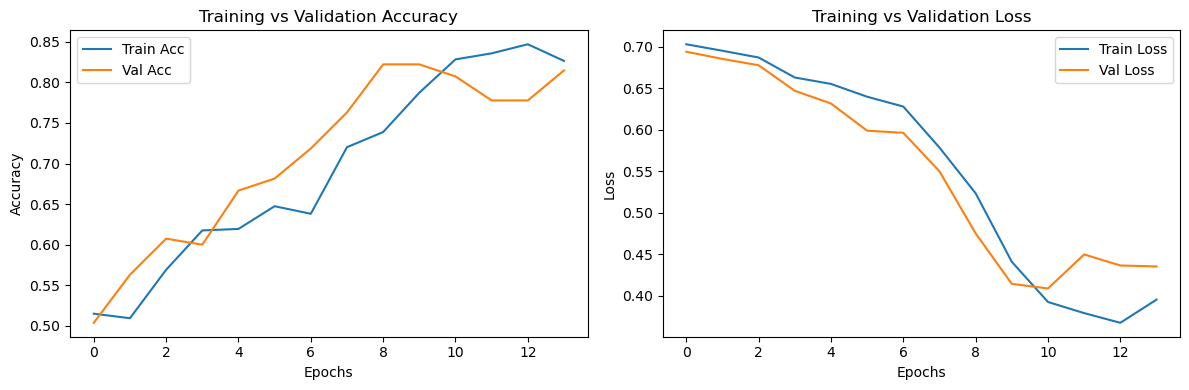

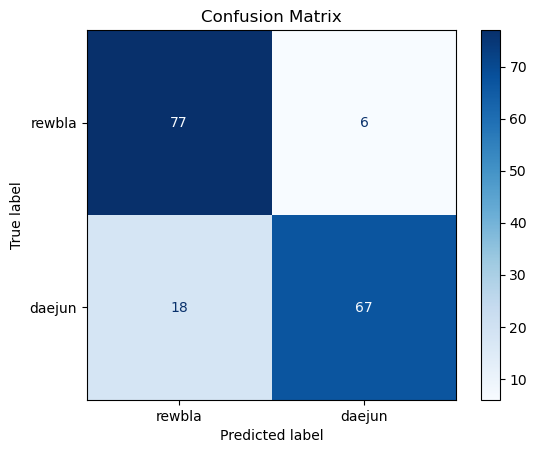

In [46]:
train_bird_cnn(epochs=20, batch_size=32, early_stopping_patience=3)

### Next Set of Parameters 
> Batch Size = 64 

> Epochs = 20

> Early Stopping = 3 

Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 678ms/step - accuracy: 0.5489 - loss: 0.8297 - val_accuracy: 0.4963 - val_loss: 0.6897
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 656ms/step - accuracy: 0.4805 - loss: 0.6935 - val_accuracy: 0.5556 - val_loss: 0.6846
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 643ms/step - accuracy: 0.5709 - loss: 0.6844 - val_accuracy: 0.6000 - val_loss: 0.6675
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 651ms/step - accuracy: 0.5371 - loss: 0.6821 - val_accuracy: 0.5852 - val_loss: 0.6696
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 660ms/step - accuracy: 0.5761 - loss: 0.6685 - val_accuracy: 0.6889 - val_loss: 0.6278
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 690ms/step - accuracy: 0.6154 - loss: 0.6677 - val_accuracy: 0.6148 - val_loss: 0.6261
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 653ms/step - accuracy: 0.5939 - loss: 0.6831 - val_accuracy: 0.7037 - val_loss: 0.6496
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 633ms/step - ac

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

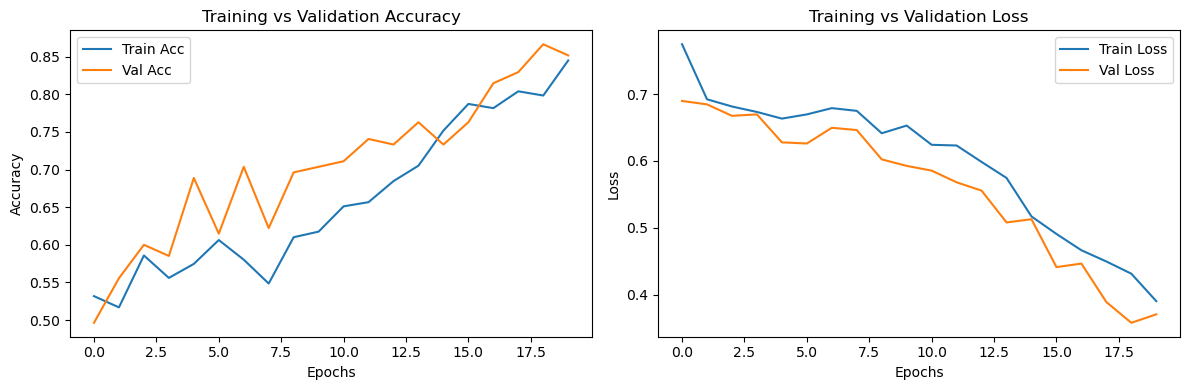

                      precision    recall  f1-score   support

Red-winged Blackbird       0.78      0.89      0.83        83
     Dark-eyed Junco       0.88      0.75      0.81        85

            accuracy                           0.82       168
           macro avg       0.83      0.82      0.82       168
        weighted avg       0.83      0.82      0.82       168



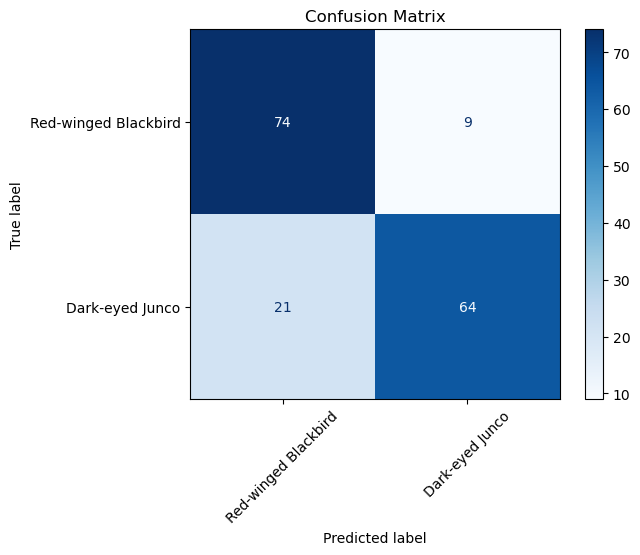

In [68]:
train_bird_cnn(epochs=20, batch_size=64, early_stopping_patience=3)

### Next Set of Parameters 
> Batch Size = 16 

> Epochs = 20

> Early Stopping = 3 

Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.4937 - loss: 0.6987 - val_accuracy: 0.5037 - val_loss: 0.6932
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.6171 - loss: 0.6859 - val_accuracy: 0.6889 - val_loss: 0.6393
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.6968 - loss: 0.6401 - val_accuracy: 0.7778 - val_loss: 0.4847
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.7798 - loss: 0.4943 - val_accuracy: 0.7037 - val_loss: 0.5042
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.7459 - loss: 0.5050 - val_accuracy: 0.8667 - val_loss: 0.3276
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.8233 - loss: 0.3611 - val_accuracy: 0.8889 - val_loss: 0.3670
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.8349 - loss: 0.4078 - val_accuracy: 0.8889 - val_loss: 0.3115
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

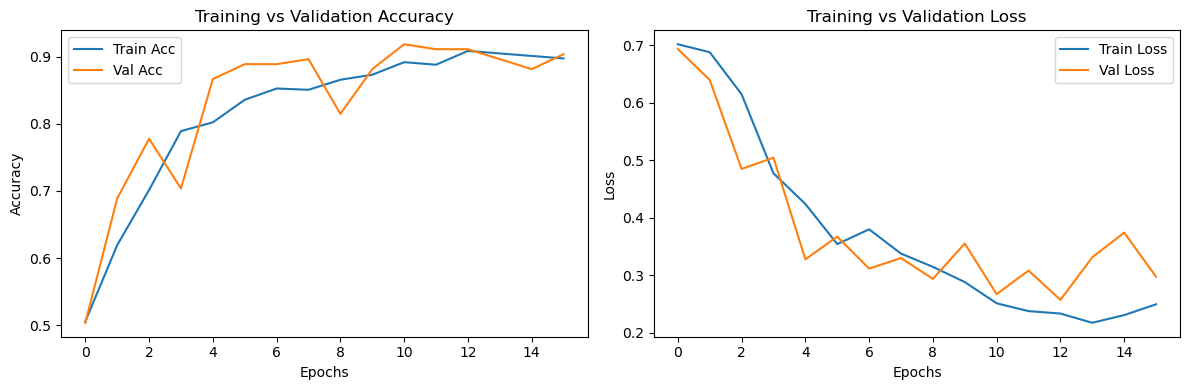

                      precision    recall  f1-score   support

Red-winged Blackbird       0.77      0.87      0.82        83
     Dark-eyed Junco       0.85      0.75      0.80        85

            accuracy                           0.81       168
           macro avg       0.81      0.81      0.81       168
        weighted avg       0.81      0.81      0.81       168



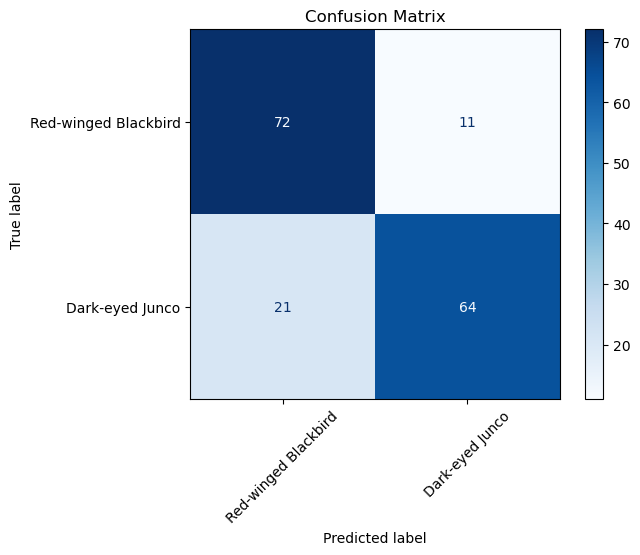

In [70]:
train_bird_cnn(epochs=20, batch_size=16, early_stopping_patience=3)

### Next Set of Parameters 
> Batch Size = 16 

> Epochs = 50

> Early Stopping = 3 

Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.4765 - loss: 0.7048 - val_accuracy: 0.5037 - val_loss: 0.6862
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.5191 - loss: 0.6855 - val_accuracy: 0.6148 - val_loss: 0.6721
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.5737 - loss: 0.6800 - val_accuracy: 0.6815 - val_loss: 0.6457
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.6067 - loss: 0.6660 - val_accuracy: 0.5111 - val_loss: 1.0763
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.6445 - loss: 0.7184 - val_accuracy: 0.7630 - val_loss: 0.5097
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.7299 - loss: 0.5438 - val_accuracy: 0.8074 - val_loss: 0.3709
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - accuracy: 0.8153 - loss: 0.4456 - val_accuracy: 0.8370 - val_loss: 0.3688
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_81 (Conv2D)              │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

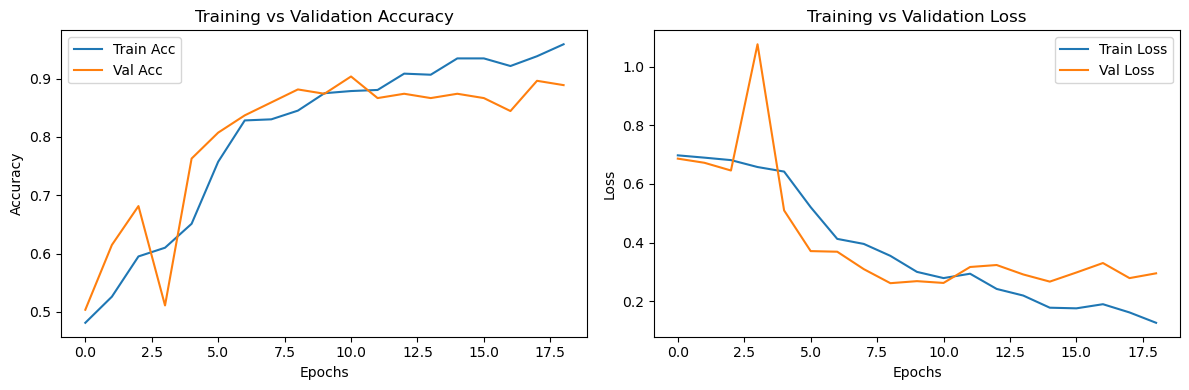

                      precision    recall  f1-score   support

Red-winged Blackbird       0.87      0.83      0.85        83
     Dark-eyed Junco       0.84      0.88      0.86        85

            accuracy                           0.86       168
           macro avg       0.86      0.86      0.86       168
        weighted avg       0.86      0.86      0.86       168



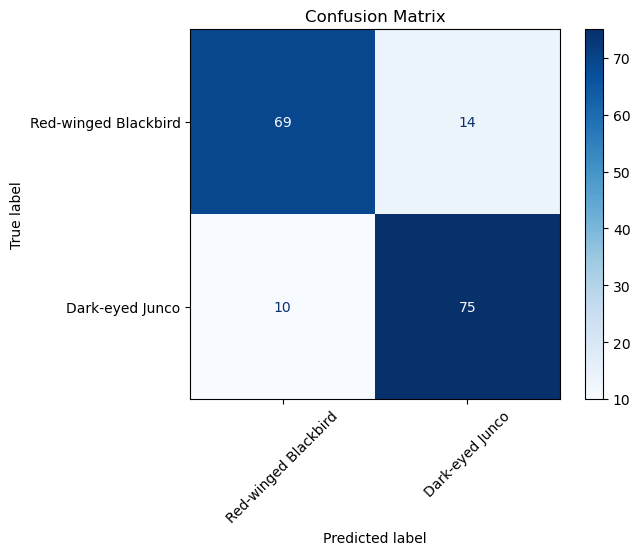

In [71]:
train_bird_cnn(epochs=50, batch_size=16, early_stopping_patience=10)

### Next Set of Parameters 
> Batch Size = 16 

> Epochs = 200

> Early Stopping = 10 

Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 274ms/step - accuracy: 0.4718 - loss: 0.7037 - val_accuracy: 0.5037 - val_loss: 0.6899
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step - accuracy: 0.4890 - loss: 0.6965 - val_accuracy: 0.5630 - val_loss: 0.6837
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 0.5440 - loss: 0.6845 - val_accuracy: 0.6889 - val_loss: 0.6161
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.6732 - loss: 0.6308 - val_accuracy: 0.7259 - val_loss: 0.5582
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.7011 - loss: 0.5701 - val_accuracy: 0.8000 - val_loss: 0.4575
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step - accuracy: 0.7492 - loss: 0.4748 - val_accuracy: 0.7704 - val_loss: 0.4434
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.8284 - loss: 0.3963 - val_accuracy: 0.8000 - val_loss: 0.4026
Epoch 8/200
34/34 ━━━━━━━━━━

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

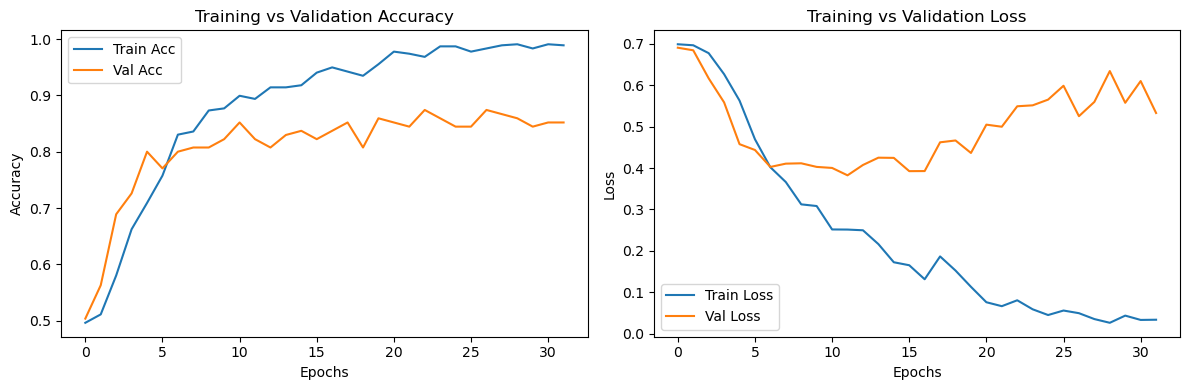

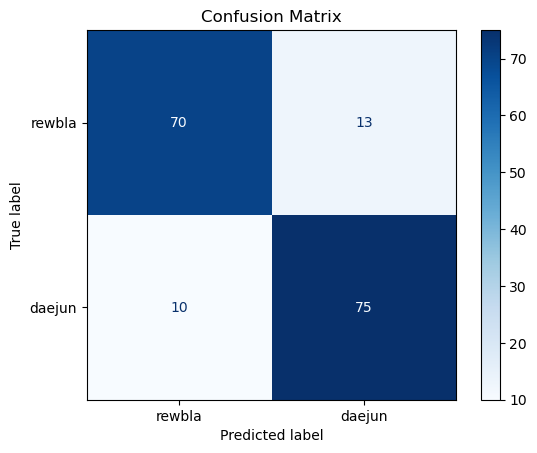

In [52]:
train_bird_cnn(epochs=200, batch_size=16, early_stopping_patience=20)

### Next Set of Parameters 
> Batch Size = 16 

> Epochs = 50

> Early Stopping = 5

Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.5292 - loss: 0.7484 - val_accuracy: 0.5778 - val_loss: 0.6917
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.5499 - loss: 0.6852 - val_accuracy: 0.6000 - val_loss: 0.6689
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.6307 - loss: 0.6597 - val_accuracy: 0.6370 - val_loss: 0.6203
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step - accuracy: 0.6699 - loss: 0.6132 - val_accuracy: 0.7111 - val_loss: 0.6164
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.6982 - loss: 0.5829 - val_accuracy: 0.6074 - val_loss: 0.6024
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.7382 - loss: 0.5617 - val_accuracy: 0.7481 - val_loss: 0.5131
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.7876 - loss: 0.4643 - val_accuracy: 0.7926 - val_loss: 0.5016
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

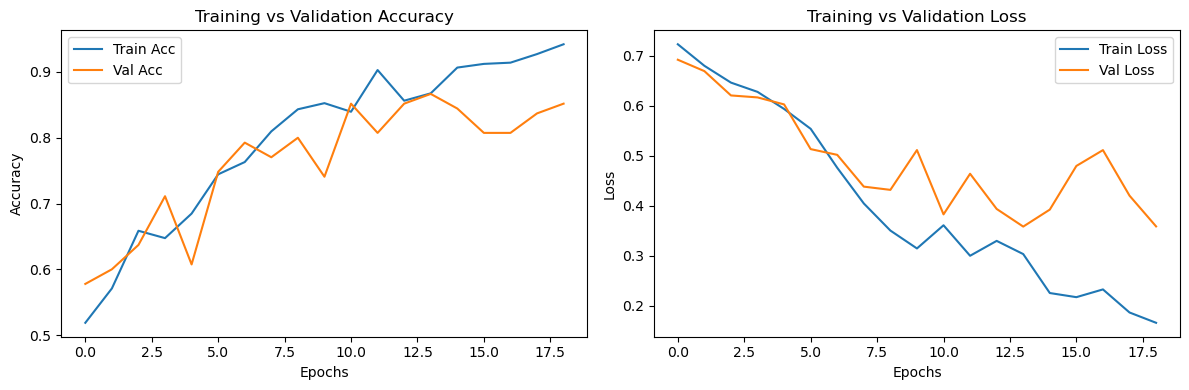

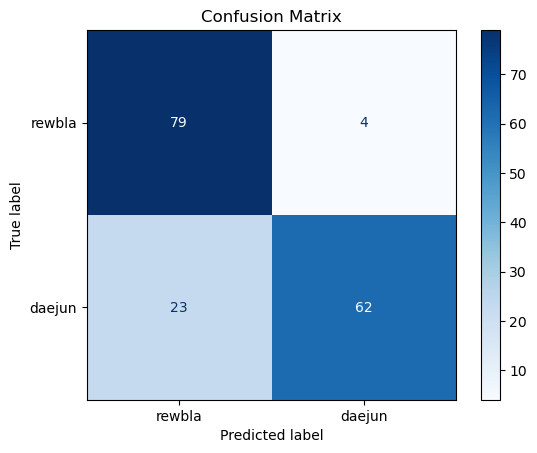

In [54]:
train_bird_cnn(epochs=50, batch_size=16, early_stopping_patience=5)

### Next Set of Parameters 
> Batch Size = 16 

> Epochs = 50

> Early Stopping = 3 

Train set size: 536
Validation set size: 135
Test set size: 168


2025-05-11 18:14:41.717161: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-05-11 18:14:41.717189: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-05-11 18:14:41.717196: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-05-11 18:14:41.717211: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-11 18:14:41.717220: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2025-05-11 18:14:42.324032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-05-11 18:14:42.327414: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.5333 - loss: 0.7616 - val_accuracy: 0.5037 - val_loss: 0.6812
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5274 - loss: 0.6798 - val_accuracy: 0.6296 - val_loss: 0.6514
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6775 - loss: 0.5995 - val_accuracy: 0.7333 - val_loss: 0.4957
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7482 - loss: 0.5488 - val_accuracy: 0.7778 - val_loss: 0.4574
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8266 - loss: 0.4216 - val_accuracy: 0.7778 - val_loss: 0.5274
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8594 - loss: 0.3584 - val_accuracy: 0.8074 - val_loss: 0.4182
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8469 - loss: 0.3811 - val_accuracy: 0.8000 - val_loss: 0.4862
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8415 - loss: 0.3753 - val_accuracy: 0.8074 - val_loss: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

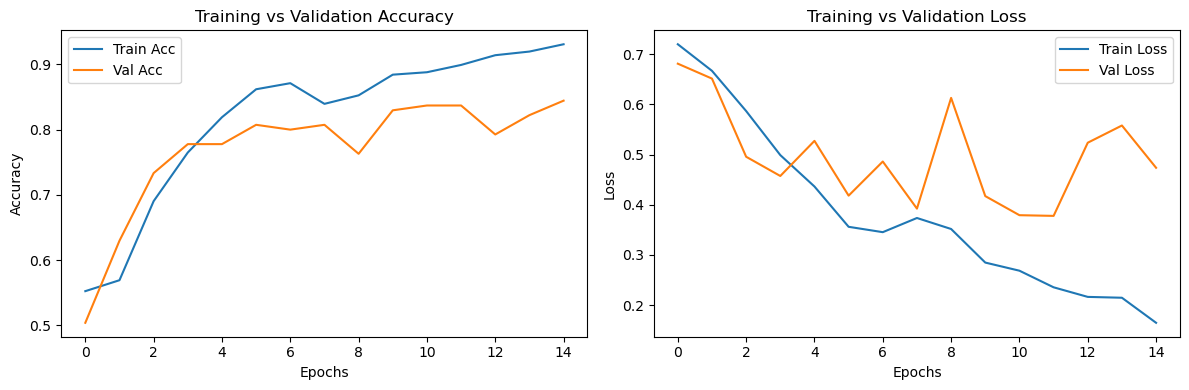

                      precision    recall  f1-score   support

Red-winged Blackbird       0.81      0.82      0.81        83
     Dark-eyed Junco       0.82      0.81      0.82        85

            accuracy                           0.82       168
           macro avg       0.82      0.82      0.82       168
        weighted avg       0.82      0.82      0.82       168



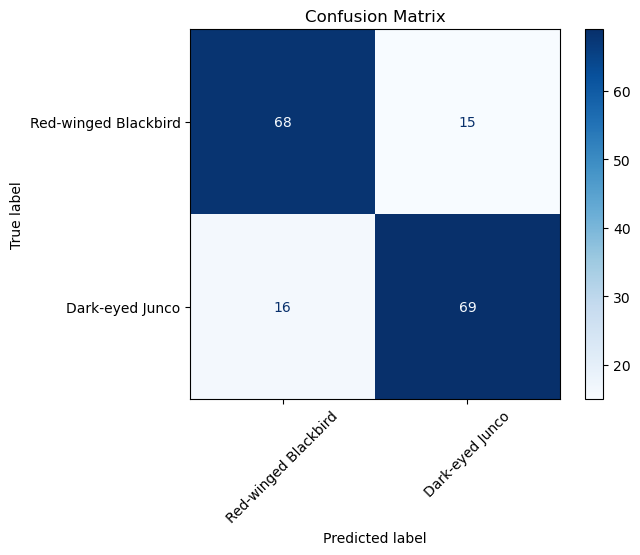

In [3]:
train_bird_cnn(epochs=50, batch_size=16, early_stopping_patience=3)

### Next Set of Parameters 
> Batch Size = 16 

> Epochs = 50

> Early Stopping = 10 

Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.4968 - loss: 0.7099 - val_accuracy: 0.4963 - val_loss: 0.6865
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5839 - loss: 0.6780 - val_accuracy: 0.5630 - val_loss: 0.6673
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5656 - loss: 0.6875 - val_accuracy: 0.5481 - val_loss: 0.6743
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5418 - loss: 0.7068 - val_accuracy: 0.5704 - val_loss: 0.6675
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6642 - loss: 0.6368 - val_accuracy: 0.6519 - val_loss: 0.6187
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6997 - loss: 0.5928 - val_accuracy: 0.7111 - val_loss: 0.5632
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7390 - loss: 0.5146 - val_accuracy: 0.7333 - val_loss: 0.5357
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/s

2025-05-11 18:16:39.931313: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.



Confusion Matrix:
[[70 13]
 [ 6 79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        83
           1       0.86      0.93      0.89        85

    accuracy                           0.89       168
   macro avg       0.89      0.89      0.89       168
weighted avg       0.89      0.89      0.89       168



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

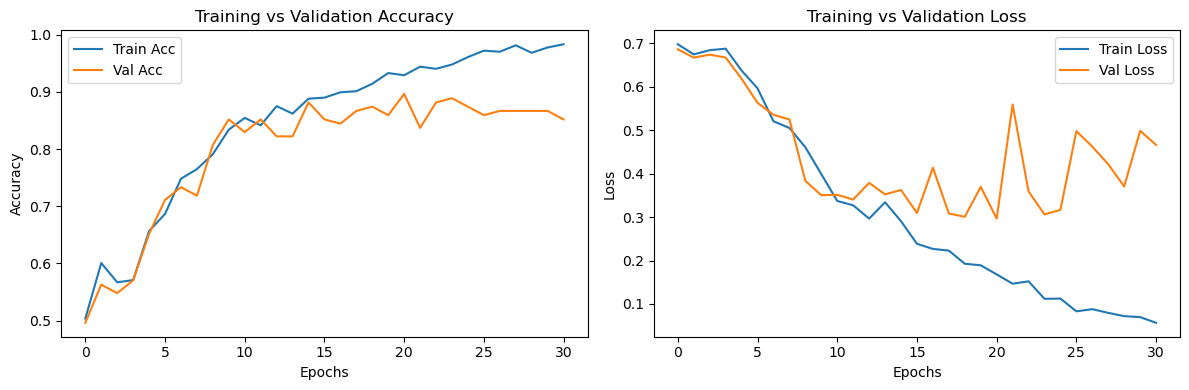

                      precision    recall  f1-score   support

Red-winged Blackbird       0.92      0.84      0.88        83
     Dark-eyed Junco       0.86      0.93      0.89        85

            accuracy                           0.89       168
           macro avg       0.89      0.89      0.89       168
        weighted avg       0.89      0.89      0.89       168



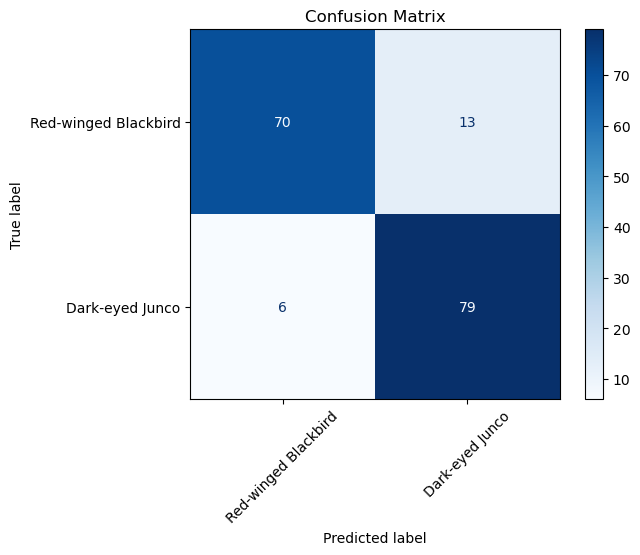

In [4]:
train_bird_cnn(epochs=50, batch_size=16, early_stopping_patience=10)

### Next Set of Parameters 
> Batch Size = 32 

> Epochs = 50

> Early Stopping = 10 

Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/50


2025-05-11 18:19:00.679003: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.5648 - loss: 0.7167 - val_accuracy: 0.5111 - val_loss: 0.6848
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.5630 - loss: 0.6847 - val_accuracy: 0.5407 - val_loss: 0.7016
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.5963 - loss: 0.6651 - val_accuracy: 0.6519 - val_loss: 0.6368
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.6822 - loss: 0.6053 - val_accuracy: 0.6741 - val_loss: 0.5890
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.7713 - loss: 0.5179 - val_accuracy: 0.7926 - val_loss: 0.4869
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8336 - loss: 0.4362 - val_accuracy: 0.7481 - val_loss: 0.4872
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8085 - loss: 0.4035 - val_accuracy: 0.8370 - val_loss: 0.3490
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8600 - loss: 0.3454 - val_accuracy: 0.8000 - val_

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

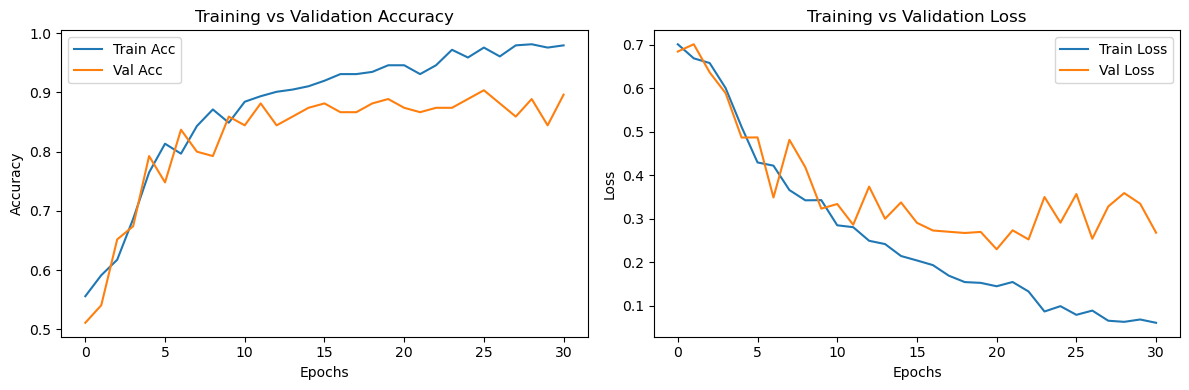

                      precision    recall  f1-score   support

Red-winged Blackbird       0.84      0.81      0.82        83
     Dark-eyed Junco       0.82      0.85      0.83        85

            accuracy                           0.83       168
           macro avg       0.83      0.83      0.83       168
        weighted avg       0.83      0.83      0.83       168



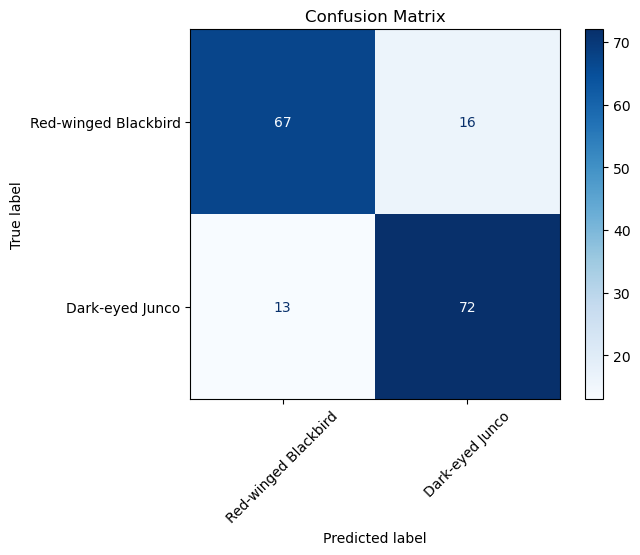

In [5]:
train_bird_cnn(epochs=50, batch_size=32, early_stopping_patience=10)

### For lopp to Compare Different batch Sizes with Epochs of 200 and early stoppng of 5 to prevent overfifitting


Training with batch size: 8
Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/200


2025-05-11 18:35:40.675999: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.4962 - loss: 0.7108 - val_accuracy: 0.5037 - val_loss: 0.6928
Epoch 2/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5053 - loss: 0.6930 - val_accuracy: 0.5037 - val_loss: 0.6840
Epoch 3/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5693 - loss: 0.6817 - val_accuracy: 0.6519 - val_loss: 0.6373
Epoch 4/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6281 - loss: 0.6356 - val_accuracy: 0.7704 - val_loss: 0.4652
Epoch 5/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7779 - loss: 0.4753 - val_accuracy: 0.8000 - val_loss: 0.4611
Epoch 6/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8119 - loss: 0.4416 - val_accuracy: 0.7407 - val_loss: 0.4868
Epoch 7/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8382 - loss: 0.3413 - val_accuracy: 0.8222 - val_loss: 0.4420
Epoch 8/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8663 - loss: 0.3088 - val_accuracy: 0.8519 - val_l

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

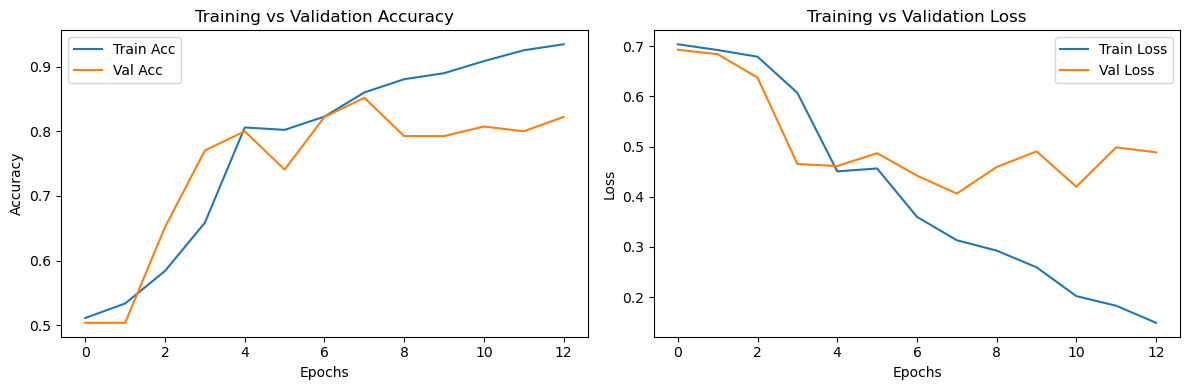

                      precision    recall  f1-score   support

Red-winged Blackbird       0.82      0.89      0.86        83
     Dark-eyed Junco       0.88      0.81      0.85        85

            accuracy                           0.85       168
           macro avg       0.85      0.85      0.85       168
        weighted avg       0.85      0.85      0.85       168



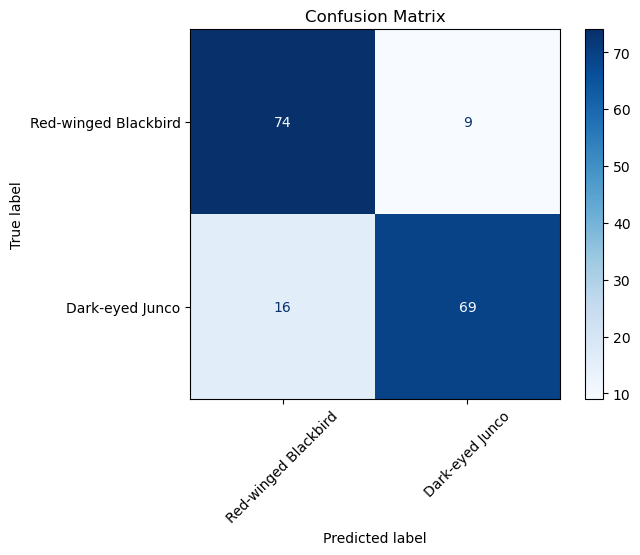


Training with batch size: 16
Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.5697 - loss: 0.6901 - val_accuracy: 0.5704 - val_loss: 0.6805
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5476 - loss: 0.6971 - val_accuracy: 0.5037 - val_loss: 0.7021
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5511 - loss: 0.6797 - val_accuracy: 0.6000 - val_loss: 0.6554
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6535 - loss: 0.6277 - val_accuracy: 0.6741 - val_loss: 0.6756
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7080 - loss: 0.5611 - val_accuracy: 0.8222 - val_loss: 0.4043
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7667 - loss: 0.5256 - val_accuracy: 0.7630 - val_loss: 0.5112
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7929 - loss: 0.4173 - val_accuracy: 0.8593 - val_loss: 0.3431
Epoch 8/20

2025-05-11 18:36:56.443286: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Confusion Matrix:
[[72 11]
 [10 75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        83
           1       0.87      0.88      0.88        85

    accuracy                           0.88       168
   macro avg       0.88      0.87      0.87       168
weighted avg       0.88      0.88      0.87       168



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

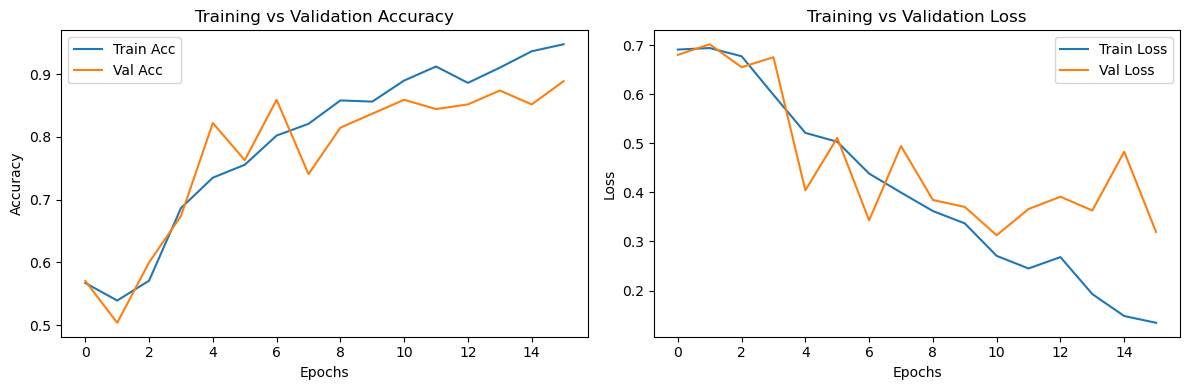

                      precision    recall  f1-score   support

Red-winged Blackbird       0.88      0.87      0.87        83
     Dark-eyed Junco       0.87      0.88      0.88        85

            accuracy                           0.88       168
           macro avg       0.88      0.87      0.87       168
        weighted avg       0.88      0.88      0.87       168



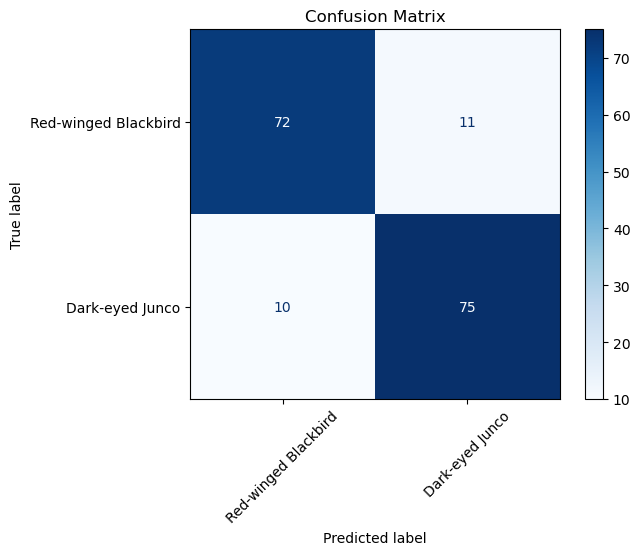


Training with batch size: 32
Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.4952 - loss: 0.7375 - val_accuracy: 0.5037 - val_loss: 0.6926
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.5342 - loss: 0.6887 - val_accuracy: 0.6815 - val_loss: 0.6695
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.6302 - loss: 0.6651 - val_accuracy: 0.6148 - val_loss: 0.6411
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.6336 - loss: 0.6288 - val_accuracy: 0.7185 - val_loss: 0.5826
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.6889 - loss: 0.5982 - val_accuracy: 0.6815 - val_loss: 0.5791
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.7202 - loss: 0.5453 - val_accuracy: 0.7704 - val_loss: 0.5003
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8269 - loss: 0.4166 - val_accuracy: 0.8222 - val_loss: 0.3981
Epo

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

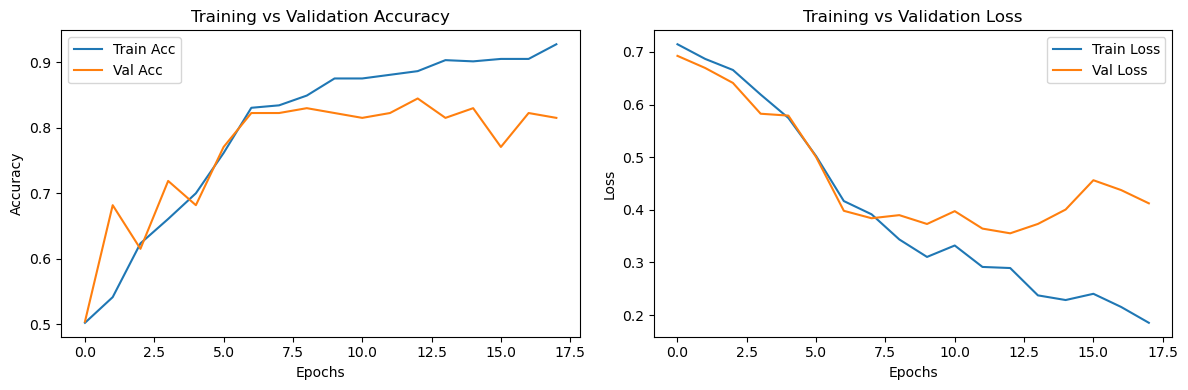

                      precision    recall  f1-score   support

Red-winged Blackbird       0.90      0.78      0.84        83
     Dark-eyed Junco       0.81      0.92      0.86        85

            accuracy                           0.85       168
           macro avg       0.86      0.85      0.85       168
        weighted avg       0.86      0.85      0.85       168



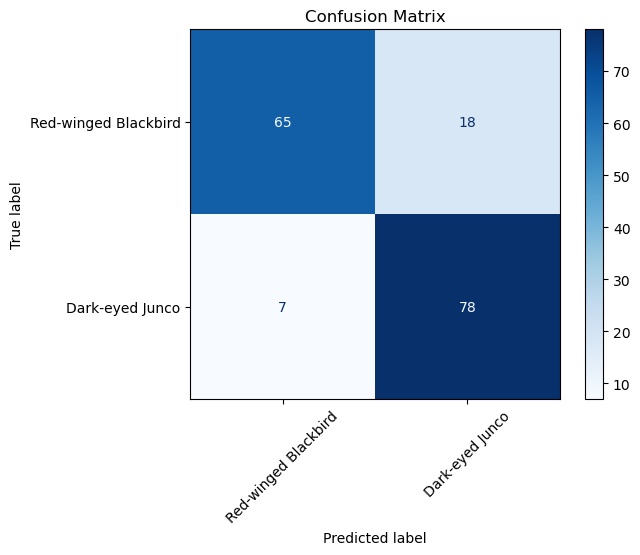


Training with batch size: 64
Train set size: 536
Validation set size: 135
Test set size: 168
Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.5472 - loss: 0.7465 - val_accuracy: 0.5037 - val_loss: 0.6909
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.5377 - loss: 0.6904 - val_accuracy: 0.5481 - val_loss: 0.6739
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.5322 - loss: 0.6913 - val_accuracy: 0.5778 - val_loss: 0.6608
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.6031 - loss: 0.6607 - val_accuracy: 0.5407 - val_loss: 0.6930
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.5394 - loss: 0.7069 - val_accuracy: 0.6963 - val_loss: 0.6116
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.6201 - loss: 0.6398 - val_accuracy: 0.5704 - val_loss: 0.6579
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.6426 - loss: 0.6783 - val_accuracy: 0.7111 - val_loss: 0.5945
Epoch 8/200
9/9 ━

2025-05-11 18:38:33.154555: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Confusion Matrix:
[[67 16]
 [ 9 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        83
           1       0.83      0.89      0.86        85

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 126, 514, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 125, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 14, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 111104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │    14,221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,942,725 (163.81 MB)

 Trainable params: 14,314,241 (54.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,628,484 (109.21 MB)

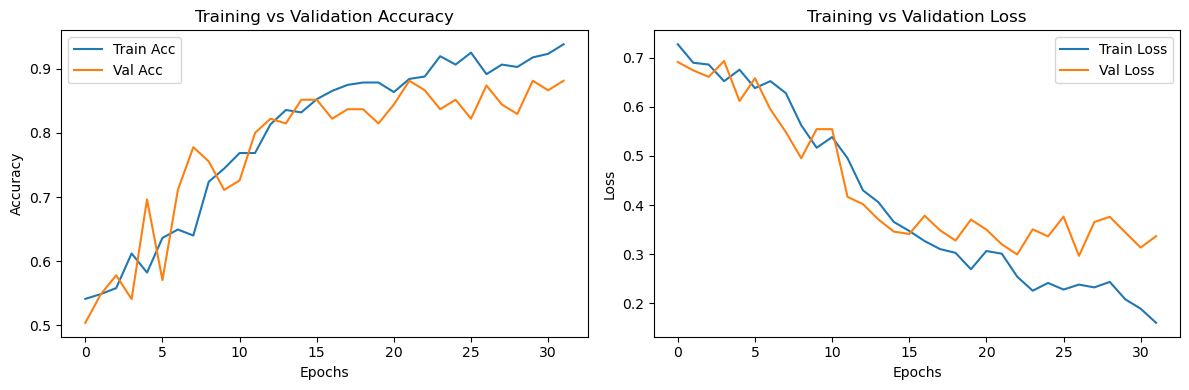

                      precision    recall  f1-score   support

Red-winged Blackbird       0.88      0.81      0.84        83
     Dark-eyed Junco       0.83      0.89      0.86        85

            accuracy                           0.85       168
           macro avg       0.85      0.85      0.85       168
        weighted avg       0.85      0.85      0.85       168



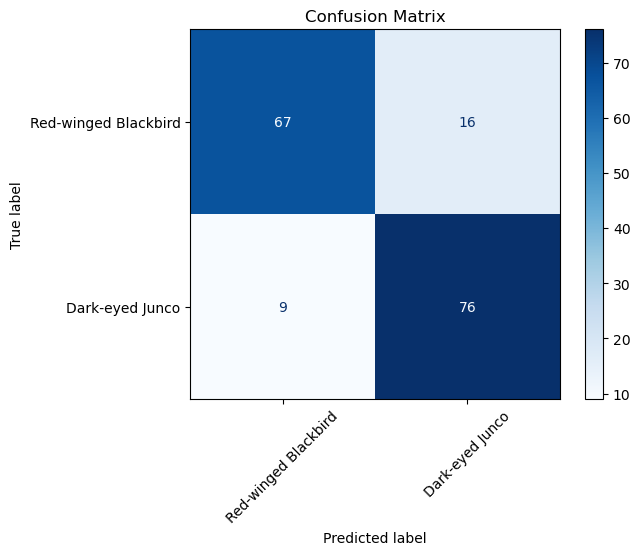

In [10]:
batch_sizes = [8, 16, 32, 64]

for bs in batch_sizes:
    print(f"\n{'='*30}\nTraining with batch size: {bs}\n{'='*30}")
    train_bird_cnn(epochs=200, batch_size=bs, early_stopping_patience=5)

## Conclusion 

A batch size of 16 was used, and a with a dropout layer of 0.4 was applied to the dense layer for regularization. The model was trained for a maximum of 200 epoch,  and early stopping (patience = 5) halted training at epochs 16 to prevent overfitting. 